In [1]:
import zarr

# Load Zarr file
zarr_file_path = "train/static/ExperimentRuns/TS_99_9/VoxelSpacing10.000/denoised.zarr"
tomogram = zarr.open(zarr_file_path, mode="r")

# Inspect the shape of the tomogram
print("Tomogram shape:", tomogram["0"].shape)
print(list(tomogram.keys()))

Tomogram shape: (184, 630, 630)
['0', '1', '2']


In [2]:
import json

# Load the JSON file
json_file_path = "train/overlay/ExperimentRuns/TS_99_9/Picks/apo-ferritin.json"
with open(json_file_path, "r") as file:
    data = json.load(file)

# Extract points
points = data["points"]

# Convert to a NumPy array of coordinates
import numpy as np

particle_coords = np.array([[p["location"]["x"], p["location"]["y"], p["location"]["z"]] for p in points])

In [3]:
import napari

# Launch napari viewer
viewer = napari.Viewer()
# Add the tomogram
viewer.add_image(tomogram["0"], name="Tomogram")
# Add particle locations as points
viewer.add_points(particle_coords, size=5, name="Particles", face_color="red")

# Start the viewer
napari.run()

In [4]:
import zarr
import json
import numpy as np
import napari

# Load the Zarr file
zarr_file_path = r"train\static\ExperimentRuns\TS_6_6\VoxelSpacing10.000\denoised.zarr"
tomogram = zarr.open(zarr_file_path, mode="r")

# Access the tomogram data and inspect its shape
tomogram_data = tomogram["0"][:]  # Load into memory as a NumPy array
print("Tomogram shape:", tomogram_data.shape)
print(tomogram_data.mean(), tomogram_data.std())
# print("Tomogram data:", tomogram_data)

# Load the JSON file for particle coordinates
json_file_path = r"train\overlay\ExperimentRuns\TS_6_6\Picks\virus-like-particle.json"
with open(json_file_path, "r") as file:
    data = json.load(file)

# Extract points and convert to a NumPy array of coordinates
points = data["points"]
particle_coords = np.array([[p["location"]["x"], p["location"]["y"], p["location"]["z"]] for p in points]) 
print("Particle data", particle_coords)
# Launch napari viewer
viewer = napari.Viewer()

# Add the tomogram data to the viewer
viewer.add_image(tomogram_data, name="Tomogram")

# Add the particle locations as points to the viewer
# viewer.add_points(particle_coords, size=50, name="Particles", face_color="red")

# Start the napari viewer
napari.run()


Tomogram shape: (184, 630, 630)
1.4182532e-07 6.4576284e-06
Particle data [[4113.927 1540.028  957.754]
 [4205.011  514.238  377.245]
 [3546.662  996.468 1199.592]
 [ 238.569 3475.323  722.892]
 [ 404.421 2707.26   970.408]
 [5686.068 5829.641  364.486]
 [5086.352 6157.563  696.444]
 [4657.586 5875.914  627.971]
 [5827.109 4997.341  854.623]
 [5157.398 4441.079  683.717]
 [5278.371 3038.921  406.17 ]
 [3005.1   4116.745  533.11 ]
 [2829.054 4175.449  828.66 ]
 [3248.07  4513.06   582.863]
 [2609.876 4569.876 1169.759]
 [2213.287 4135.017 1286.851]
 [3303.905 5697.825  789.744]
 [1008.748 5949.213 1077.303]
 [5749.052 3911.392  275.342]]


In [80]:
import zarr
import json
import numpy as np
import napari

# Load the Zarr file
zarr_file_path = r"train\static\ExperimentRuns\TS_6_6\VoxelSpacing10.000\isonetcorrected.zarr"
tomogram = zarr.open(zarr_file_path, mode="r")

# Access the tomogram data and inspect its shape
tomogram_data = tomogram["0"][:]  # Load into memory as a NumPy array
print("Tomogram shape:", tomogram_data.shape)
print("Mean before normalization:", tomogram_data.mean())
print("Std before normalization:", tomogram_data.std())

# Normalize the tomogram data between 0 and 1
tomogram_min = tomogram_data.min()
tomogram_max = tomogram_data.max()
tomogram_data = (tomogram_data - tomogram_min) / (tomogram_max - tomogram_min)

# Reverse the normalized values
tomogram_data = 1 - tomogram_data
print("Mean after reversing:", tomogram_data.mean())
print("Std after reversing:", tomogram_data.std())

# Load the JSON file for particle coordinates
json_file_path = r"train\overlay\ExperimentRuns\TS_6_6\Picks\virus-like-particle.json"
with open(json_file_path, "r") as file:
    data = json.load(file)

# Extract points and convert to a NumPy array of coordinates
points = data["points"]
particle_coords = np.array([[p["location"]["x"], p["location"]["y"], p["location"]["z"]] for p in points]) 
print("Particle data:", particle_coords)

# Launch napari viewer
viewer = napari.Viewer()

# Add the reversed tomogram data to the viewer
viewer.add_image(tomogram_data, name="Reversed Tomogram")

# Add the particle locations as points to the viewer
# viewer.add_points(particle_coords, size=50, name="Particles", face_color="red")

# Start the napari viewer
napari.run()


Tomogram shape: (184, 630, 630)
Mean before normalization: -0.33163637
Std before normalization: 0.32928234
Mean after reversing: 0.17129521
Std after reversing: 0.034847815
Particle data: [[4113.927 1540.028  957.754]
 [4205.011  514.238  377.245]
 [3546.662  996.468 1199.592]
 [ 238.569 3475.323  722.892]
 [ 404.421 2707.26   970.408]
 [5686.068 5829.641  364.486]
 [5086.352 6157.563  696.444]
 [4657.586 5875.914  627.971]
 [5827.109 4997.341  854.623]
 [5157.398 4441.079  683.717]
 [5278.371 3038.921  406.17 ]
 [3005.1   4116.745  533.11 ]
 [2829.054 4175.449  828.66 ]
 [3248.07  4513.06   582.863]
 [2609.876 4569.876 1169.759]
 [2213.287 4135.017 1286.851]
 [3303.905 5697.825  789.744]
 [1008.748 5949.213 1077.303]
 [5749.052 3911.392  275.342]]


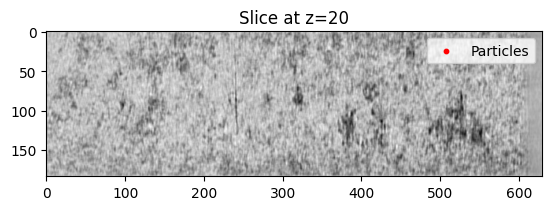

In [10]:
import matplotlib.pyplot as plt

# Choose a slice (e.g., z=20)
z_slice = 20
slice_data = tomogram["0"][:, :, z_slice]
particle_coords = particle_coords * 1e-9
# Extract particles within this slice
slice_particles = particle_coords[particle_coords[:, 2] == z_slice]

# Plot the slice
plt.imshow(slice_data, cmap="gray")
plt.scatter(slice_particles[:, 0], slice_particles[:, 1], c="red", s=10, label="Particles")
plt.legend()
plt.title(f"Slice at z={z_slice}")
plt.show()


In [1]:
import copick

# Paths to your tomogram and particle location JSON
zarr_file_path = "train/static/ExperimentRuns/TS_99_9/VoxelSpacing10.000/denoised.zarr"
json_file_path = "train/overlay/ExperimentRuns/TS_99_9/Picks/apo-ferritin.json"

# Load the tomogram using copick
tomogram = copick.load_tomogram(zarr_file_path)

# Load the particle locations using copick
particles = copick.load_particles(json_file_path)

# Inspect the loaded data
print("Tomogram shape:", tomogram["0"].shape)
print("Number of particles:", len(particles))
print("Sample particle coordinates:", particles[:5])  # Replace with specific functions if needed


AttributeError: module 'copick' has no attribute 'load_tomogram'

In [ ]:
# Generate a segmentation mask from particle locations
mask = copick.particles_to_mask(particles, tomogram.shape)

# Check the mask shape
print("Mask shape:", mask.shape)


In [ ]:
import napari

# Launch napari viewer
viewer = napari.Viewer()

# Add the tomogram
viewer.add_image(tomogram, name="Tomogram")

# Add the segmentation mask
viewer.add_labels(mask, name="Segmentation Mask")

# Start the napari viewer
napari.run()


In [53]:
import torch
import math

def create_cube_tensor(size, grid_size):
    """Create a tensor with a cube centered in the grid."""
    tensor = torch.zeros(grid_size, grid_size, grid_size)
    start = (grid_size - size) // 2
    end = start + size
    tensor[start:end, start:end, start:end] = 1
    return tensor

def create_sphere_tensor(radius, grid_size):
    """Create a tensor with a sphere centered in the grid."""
    tensor = torch.zeros(grid_size, grid_size, grid_size)
    center = grid_size // 2
    for x in range(grid_size):
        for y in range(grid_size):
            for z in range(grid_size):
                if (x - center)**2 + (y - center)**2 + (z - center)**2 <= radius**2:
                    tensor[x, y, z] = 1
    return tensor

def create_torus_tensor(inner_radius, outer_radius, grid_size):
    """Create a tensor with a torus centered in the grid."""
    tensor = torch.zeros(grid_size, grid_size, grid_size)
    center = grid_size // 2
    for x in range(grid_size):
        for y in range(grid_size):
            for z in range(grid_size):
                x_dist = x - center
                y_dist = y - center
                z_dist = z - center
                distance_xy = math.sqrt(x_dist**2 + y_dist**2)
                torus_condition = (outer_radius - distance_xy)**2 + z_dist**2
                if inner_radius**2 <= torus_condition <= outer_radius**2:
                    tensor[x, y, z] = 1
    return tensor

def create_cylinder_tensor(radius, height, grid_size):
    """Create a tensor with a vertical cylinder centered in the grid."""
    tensor = torch.zeros(grid_size, grid_size, grid_size)
    center = grid_size // 2
    half_height = height // 2
    for x in range(grid_size):
        for y in range(grid_size):
            if (x - center)**2 + (y - center)**2 <= radius**2:
                tensor[:, x, y] = 1
    tensor[:center - half_height, :, :] = 0
    tensor[center + half_height:, :, :] = 0
    return tensor

def create_pyramid_tensor(size, grid_size):
    """Create a tensor with a square-based pyramid centered in the grid."""
    tensor = torch.zeros(grid_size, grid_size, grid_size)
    center = grid_size // 2
    for z in range(size):
        start = center - (size - z) // 2
        end = center + (size - z) // 2
        tensor[z, start:end, start:end] = 1
    return tensor

def create_ellipsoid_tensor(rx, ry, rz, grid_size):
    """Create a tensor with an ellipsoid centered in the grid."""
    tensor = torch.zeros(grid_size, grid_size, grid_size)
    center = grid_size // 2
    for x in range(grid_size):
        for y in range(grid_size):
            for z in range(grid_size):
                if ((x - center) / rx)**2 + ((y - center) / ry)**2 + ((z - center) / rz)**2 <= 1:
                    tensor[x, y, z] = 1
    return tensor

def create_cone_tensor(radius, height, grid_size):
    """Create a tensor with a cone centered in the grid."""
    tensor = torch.zeros(grid_size, grid_size, grid_size)
    center = grid_size // 2
    for z in range(height):
        current_radius = radius * (1 - z / height)
        for x in range(grid_size):
            for y in range(grid_size):
                if (x - center)**2 + (y - center)**2 <= current_radius**2:
                    tensor[z, x, y] = 1
    return tensor

def create_mobius_strip_tensor(width, radius, grid_size):
    """Create a tensor with a Mobius strip centered in the grid."""
    tensor = torch.zeros(grid_size, grid_size, grid_size)
    center = grid_size // 2
    for t in torch.linspace(0, 2 * math.pi, steps=100):
        x = int(center + (radius + width * math.cos(t / 2)) * math.cos(t))
        y = int(center + (radius + width * math.cos(t / 2)) * math.sin(t))
        z = int(center + width * math.sin(t / 2))
        if 0 <= x < grid_size and 0 <= y < grid_size and 0 <= z < grid_size:
            tensor[z, x, y] = 1
    return tensor

def create_hyperboloid_tensor(a, b, c, grid_size):
    """Create a tensor with a hyperboloid centered in the grid."""
    tensor = torch.zeros(grid_size, grid_size, grid_size)
    center = grid_size // 2
    for x in range(grid_size):
        for y in range(grid_size):
            for z in range(grid_size):
                x_rel = (x - center) / a
                y_rel = (y - center) / b
                z_rel = (z - center) / c
                if x_rel**2 + y_rel**2 - z_rel**2 <= 1:
                    tensor[x, y, z] = 1
    return tensor

def create_klein_bottle_tensor(radius, tube_radius, grid_size):
    """Create a tensor with a 3D representation of a Klein bottle."""
    tensor = torch.zeros(grid_size, grid_size, grid_size)
    center = grid_size // 2
    for t in torch.linspace(0, 2 * math.pi, steps=100):
        for u in torch.linspace(0, 2 * math.pi, steps=50):
            x = int(center + (radius + tube_radius * math.cos(u)) * math.cos(t))
            y = int(center + (radius + tube_radius * math.cos(u)) * math.sin(t))
            z = int(center + tube_radius * math.sin(u) * math.cos(t / 2))
            if 0 <= x < grid_size and 0 <= y < grid_size and 0 <= z < grid_size:
                tensor[z, x, y] = 1
    return tensor

def create_fractal_tensor(grid_size, iterations):
    """Create a tensor with a simple fractal-like structure (e.g., Menger sponge approximation)."""
    tensor = torch.ones(grid_size, grid_size, grid_size)
    step = grid_size // 3
    for _ in range(iterations):
        for x in range(1, grid_size, step):
            for y in range(1, grid_size, step):
                for z in range(1, grid_size, step):
                    tensor[x:x + step // 3, y:y + step // 3, z:z + step // 3] = 0
        step //= 3
        if step < 1:
            break
    return tensor

# Examples of shape generation
grid_size = 64

# Generate tensors for each new shape
cube_tensor = create_cube_tensor(size=20, grid_size=grid_size)
sphere_tensor = create_sphere_tensor(radius=20, grid_size=grid_size)
torus_tensor = create_torus_tensor(inner_radius=10, outer_radius=20, grid_size=grid_size)
cylinder_tensor = create_cylinder_tensor(radius=15, height=30, grid_size=grid_size)
pyramid_tensor = create_pyramid_tensor(size=30, grid_size=grid_size)
ellipsoid_tensor = create_ellipsoid_tensor(rx=10, ry=15, rz=20, grid_size=grid_size)
cone_tensor = create_cone_tensor(radius=15, height=30, grid_size=grid_size)
mobius_tensor = create_mobius_strip_tensor(width=5, radius=20, grid_size=grid_size)
hyperboloid_tensor = create_hyperboloid_tensor(a=15, b=15, c=30, grid_size=grid_size)
klein_bottle_tensor = create_klein_bottle_tensor(radius=15, tube_radius=5, grid_size=grid_size)
fractal_tensor = create_fractal_tensor(grid_size=grid_size, iterations=3)

# Display shapes
shapes = {
    "Cube": cube_tensor,
    "Sphere": sphere_tensor,
    "Torus": torus_tensor,
    "Cylinder": cylinder_tensor,
    "Pyramid": pyramid_tensor,
    "Ellipsoid": ellipsoid_tensor,
    "Cone": cone_tensor,
    "Mobius Strip": mobius_tensor,
    "Hyperboloid": hyperboloid_tensor,
    "Klein Bottle": klein_bottle_tensor,
    "Fractal": fractal_tensor
}

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_tensor(tensor, title="3D Shape"):
    """Visualize a 3D tensor using Matplotlib."""
    if len(tensor.shape) != 3:
        raise ValueError(f"Expected a 3D tensor, but got shape {tensor.shape}")
    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Get the indices of non-zero elements (the "solid" parts)
    nonzero_indices = tensor.nonzero()  # Returns a 2D tensor of indices
    z, x, y = nonzero_indices[:, 0], nonzero_indices[:, 1], nonzero_indices[:, 2]  # Split into components
    
    # Scatter plot for visualizing voxels
    ax.scatter(x.numpy(), y.numpy(), z.numpy(), zdir='z', c='black', alpha=0.8, marker='o', s=2)
    
    # Setting labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    plt.show()

def visualize_with_napari(tensor, points=None, tensor_name="3D Structure", points_name="Points"):
    """
    Visualize a 3D tensor using Napari.
    
    Parameters:
        tensor (torch.Tensor or np.ndarray): The 3D tensor to visualize.
        points (np.ndarray): Optional points to overlay, as an array of shape (N, 3).
        tensor_name (str): Name for the tensor layer.
        points_name (str): Name for the points layer.
    """
    # Convert tensor to NumPy array if necessary
    if isinstance(tensor, torch.Tensor):
        tensor = tensor.numpy()

    # Launch Napari viewer
    viewer = napari.Viewer()
    
    # Add the tensor as a 3D image
    viewer.add_image(tensor, name=tensor_name)
    
    # Add points if provided
    if points is not None:
        viewer.add_points(points, size=5, name=points_name, face_color="red")
    
    # Start the Napari viewer
    napari.run()

for shape_name, tensor in shapes.items():
    print(f"Tensor shape for {shape_name}:", tensor.shape)
    print(f"Visualizing {shape_name}...")
    # visualize_tensor(tensor, title=shape_name)
    visualize_with_napari(tensor, tensor_name=shape_name)

Tensor shape for Cube: torch.Size([64, 64, 64])
Visualizing Cube...
Tensor shape for Sphere: torch.Size([64, 64, 64])
Visualizing Sphere...
Tensor shape for Torus: torch.Size([64, 64, 64])
Visualizing Torus...
Tensor shape for Cylinder: torch.Size([64, 64, 64])
Visualizing Cylinder...
Tensor shape for Pyramid: torch.Size([64, 64, 64])
Visualizing Pyramid...
Tensor shape for Ellipsoid: torch.Size([64, 64, 64])
Visualizing Ellipsoid...
Tensor shape for Cone: torch.Size([64, 64, 64])
Visualizing Cone...
Tensor shape for Mobius Strip: torch.Size([64, 64, 64])
Visualizing Mobius Strip...
Tensor shape for Hyperboloid: torch.Size([64, 64, 64])
Visualizing Hyperboloid...
Tensor shape for Klein Bottle: torch.Size([64, 64, 64])
Visualizing Klein Bottle...
Tensor shape for Fractal: torch.Size([64, 64, 64])
Visualizing Fractal...


In [34]:
print(cube_tensor[32, 32, 32])

tensor(1.)


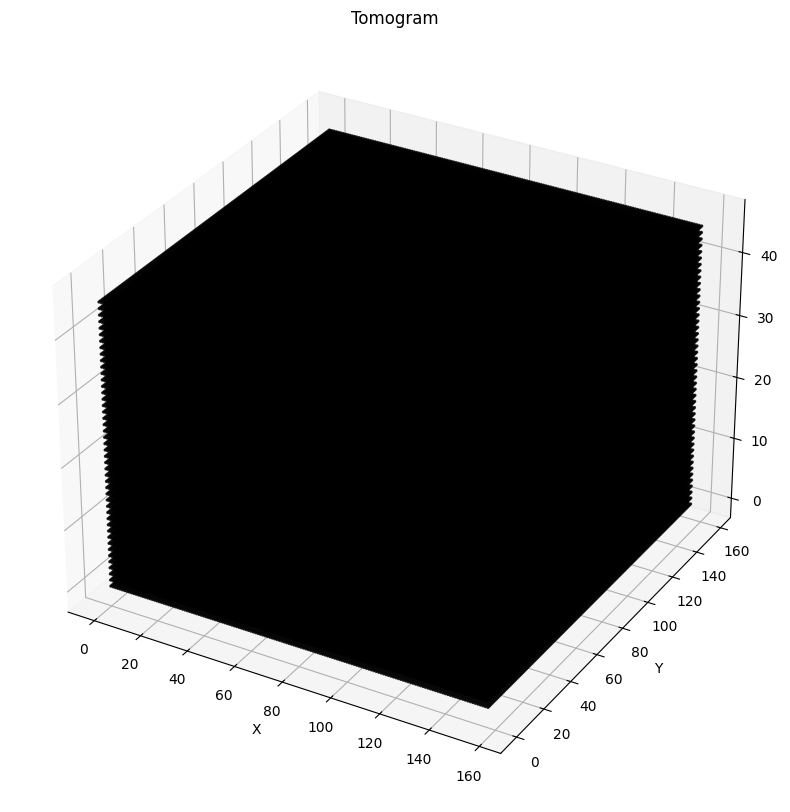

In [51]:
def visualize_tomogram(tensor, title="3D Shape"):
    """Visualize a 3D tensor using Matplotlib."""
    if len(tensor.shape) != 3:
        raise ValueError(f"Expected a 3D tensor, but got shape {tensor.shape}")
    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Get the indices of non-zero elements (the "solid" parts)
    z, x, y = torch.nonzero(tensor, as_tuple=True)  # Unpack directly into z, x, y
    
    # Scatter plot for visualizing voxels
    ax.scatter(x.numpy(), y.numpy(), z.numpy(), zdir='z', c='black', alpha=0.8, marker='o', s=2)
    
    # Setting labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    plt.show()

# visualize_tomogram(torch.tensor((tomogram_data - tomogram_data.mean())/tomogram_data.std()), title="Tomogram")
visualize_tomogram(torch.ones_like(torch.tensor(tomogram_data)), title="Tomogram")

In [67]:
import random
import math

# Assign unique class IDs to each 3D shape
shape_classes = {
    "cube": 2,
    "sphere": 3,
    "torus": 4,
    "cylinder": 5,
    "pyramid": 6,
    "ellipsoid": 7,
    "cone": 8,
    "mobius_strip": 9,
    "hyperboloid": 10,
    "klein_bottle": 11,
    "fractal": 12
}


def rotate_tensor(tensor, axis, angle):
    """Rotate the tensor around a specified axis by a given angle."""
    grid_size = tensor.shape[0]
    coords = torch.stack(torch.meshgrid(
        torch.arange(grid_size), torch.arange(grid_size), torch.arange(grid_size), indexing="ij"
    ), dim=-1).float()
    center = grid_size // 2
    coords -= center
    
    # Define rotation matrices
    cos_angle = math.cos(angle)
    sin_angle = math.sin(angle)
    if axis == 'x':
        rot_matrix = torch.tensor([
            [1, 0, 0],
            [0, cos_angle, -sin_angle],
            [0, sin_angle, cos_angle]
        ])
    elif axis == 'y':
        rot_matrix = torch.tensor([
            [cos_angle, 0, sin_angle],
            [0, 1, 0],
            [-sin_angle, 0, cos_angle]
        ])
    elif axis == 'z':
        rot_matrix = torch.tensor([
            [cos_angle, -sin_angle, 0],
            [sin_angle, cos_angle, 0],
            [0, 0, 1]
        ])
    
    # Rotate coordinates
    rotated_coords = torch.matmul(coords.reshape(-1, 3), rot_matrix.T).reshape(grid_size, grid_size, grid_size, 3)
    rotated_coords += center
    rotated_coords = rotated_coords.round().long()

    # Create a new tensor by sampling the rotated coordinates
    rotated_tensor = torch.zeros_like(tensor)
    for x, y, z in rotated_coords.reshape(-1, 3):
        if 0 <= x < grid_size and 0 <= y < grid_size and 0 <= z < grid_size:
            rotated_tensor[x, y, z] = tensor[
                max(0, min(grid_size - 1, x)),
                max(0, min(grid_size - 1, y)),
                max(0, min(grid_size - 1, z))
            ]
    return rotated_tensor

def add_shape_to_tensor(grid, shape_tensor, class_id):
    """Add a shape tensor to the grid with random displacement and rotation."""
    grid_size = grid.shape[0]
    
    # Randomly rotate the shape tensor
    if random.random() < 0.5:
        axis = random.choice(['x', 'y', 'z'])
        angle = random.uniform(0, 2 * math.pi)
        shape_tensor = rotate_tensor(shape_tensor, axis, angle)
    
    # Random displacement
    displacement = [
        random.randint(-grid_size // 4, grid_size // 4),
        random.randint(-grid_size // 4, grid_size // 4),
        random.randint(-grid_size // 4, grid_size // 4)
    ]
    shape_size = torch.tensor(shape_tensor.shape)
    offset = torch.tensor([
        max(0, -displacement[i]) for i in range(3)
    ])
    end_offset = torch.tensor([
        min(grid_size, grid_size + displacement[i]) for i in range(3)
    ])

    # Apply displacement
    cropped_shape = shape_tensor[
        offset[0]:end_offset[0],
        offset[1]:end_offset[1],
        offset[2]:end_offset[2]
    ]
    grid[offset[0]:end_offset[0], offset[1]:end_offset[1], offset[2]:end_offset[2]] = (
        cropped_shape * class_id
    )
    return grid

def generate_training_data(grid_size=24, num_samples=100):
    """Generate training data with random displacements and rotations."""
    data_X, data_Y = [], []
    for _ in range(num_samples):
        X = torch.zeros(grid_size, grid_size, grid_size, dtype=torch.int)  # Binary input tensor
        Y = torch.ones(grid_size, grid_size, grid_size, dtype=torch.int)  # Class ID ground truth tensor
        shape_types = list(shape_classes.keys())
        num_shapes = random.randint(1, 2)  # Randomly decide to add 1 or 2 shapes
        
        selected_shapes = random.sample(shape_types, num_shapes)
        for shape_name in selected_shapes:
            # Generate shape tensor with random parameters
            if shape_name == "cube":
                size = random.randint(4, 8)
                shape_tensor = create_cube_tensor(size, grid_size)
            elif shape_name == "sphere":
                radius = random.randint(4, 8)
                shape_tensor = create_sphere_tensor(radius, grid_size)
            elif shape_name == "torus":
                inner_radius = random.randint(2, 4)
                outer_radius = random.randint(5, 8)
                shape_tensor = create_torus_tensor(inner_radius, outer_radius, grid_size)
            elif shape_name == "cylinder":
                radius = random.randint(3, 5)
                height = random.randint(6, 10)
                shape_tensor = create_cylinder_tensor(radius, height, grid_size)
            elif shape_name == "pyramid":
                size = random.randint(5, 8)
                shape_tensor = create_pyramid_tensor(size, grid_size)
            elif shape_name == "ellipsoid":
                rx, ry, rz = random.randint(3, 6), random.randint(3, 6), random.randint(4, 8)
                shape_tensor = create_ellipsoid_tensor(rx, ry, rz, grid_size)
            elif shape_name == "cone":
                radius = random.randint(3, 5)
                height = random.randint(6, 10)
                shape_tensor = create_cone_tensor(radius, height, grid_size)
            elif shape_name == "mobius_strip":
                width, radius = random.randint(2, 4), random.randint(6, 8)
                shape_tensor = create_mobius_strip_tensor(width, radius, grid_size)
            elif shape_name == "hyperboloid":
                a, b, c = random.randint(4, 6), random.randint(4, 6), random.randint(5, 8)
                shape_tensor = create_hyperboloid_tensor(a, b, c, grid_size)
            elif shape_name == "klein_bottle":
                radius, tube_radius = random.randint(4, 6), random.randint(2, 3)
                shape_tensor = create_klein_bottle_tensor(radius, tube_radius, grid_size)
            elif shape_name == "fractal":
                iterations = random.randint(1, 2)
                shape_tensor = create_fractal_tensor(grid_size, iterations)
            
            # Add shape to the tensor with random displacement and rotation
            X = add_shape_to_tensor(X, shape_tensor, 1)
            Y = add_shape_to_tensor(Y, shape_tensor, shape_classes[shape_name])
        
        data_X.append(X)
        data_Y.append(Y)
    return data_X, data_Y

def visualize_with_napari(tensor, ground_truth=None, points=None, tensor_name="3D Structure", gt_name="Ground Truth", points_name="Points"):
    """
    Visualize a 3D tensor and its ground truth using Napari.
    
    Parameters:
        tensor (torch.Tensor or np.ndarray): The 3D tensor to visualize.
        ground_truth (torch.Tensor or np.ndarray): The ground truth tensor to overlay.
        points (np.ndarray): Optional points to overlay, as an array of shape (N, 3).
        tensor_name (str): Name for the tensor layer.
        gt_name (str): Name for the ground truth layer.
        points_name (str): Name for the points layer.
    """
    # Convert tensors to NumPy arrays if necessary
    if isinstance(tensor, torch.Tensor):
        tensor = tensor.numpy()
    if ground_truth is not None and isinstance(ground_truth, torch.Tensor):
        ground_truth = ground_truth.numpy()

    # Launch Napari viewer
    viewer = napari.Viewer()
    
    # Add the tensor as a 3D image
    viewer.add_image(tensor, name=tensor_name)
    
    # Add the ground truth as a separate layer if provided
    if ground_truth is not None:
        viewer.add_labels(ground_truth, name=gt_name)
    
    # Add points if provided
    if points is not None:
        viewer.add_points(points, size=5, name=points_name, face_color="red")
    
    # Start the Napari viewer
    napari.run()


# Example: Generate 10 samples
X, Y = generate_training_data(grid_size=24, num_samples=10)

for i in range(10):
    visualize_with_napari(
        X[i], 
        ground_truth=Y[i], 
        tensor_name=f"Training Example {i + 1}", 
        gt_name=f"Ground Truth {i + 1}"
    )

In [25]:
import zarr
import json
import numpy as np
import napari
import os

experiment_run = "TS_73_6"
# Define paths
zarr_file_path = os.path.join("train", "static", "ExperimentRuns", experiment_run, "VoxelSpacing10.000", "denoised.zarr")
particle_types = ["virus-like-particle", "apo-ferritin", "beta-amylase", "beta-galactosidase", "ribosome", "thyroglobulin"]
json_base_path = os.path.join("train", "overlay", "ExperimentRuns", experiment_run, "Picks")

# Load the Zarr file
try:
    tomogram = zarr.open(zarr_file_path, mode="r")
    tomogram_data = tomogram["0"][:]  # Load into memory as a NumPy array
    print("Tomogram shape (z, y, x):", tomogram_data.shape)
    print("Mean:", tomogram_data.mean(), "Std Dev:", tomogram_data.std())
    # print the tomogram_data's min and max value
    print("Min:", tomogram_data.min(), "Max:", tomogram_data.max())
    # Normalize the tomogram data to be unit Gaussian
    tomogram_data = (tomogram_data - tomogram_data.mean()) / tomogram_data.std()


except Exception as e:
    print("Error loading Zarr file:", e)
    exit()

# Voxel spacing (assumed, replace with actual values)
voxel_spacing = [10.0, 10.0, 10.0]  # Replace with voxel spacing (z, y, x) in angstroms per voxel

# Load and transform particle coordinates for all types
total = 0
particle_coords = {}
for particle_type in particle_types:
    json_file_path = os.path.join(json_base_path, f"{particle_type}.json")
    try:
        with open(json_file_path, "r") as file:
            data = json.load(file)
        points = data["points"]

        # Convert from real-world coordinates (angstroms) to voxel indices and reorder to (z, y, x)
        particle_coords[particle_type] = np.array([
            [
                p["location"]["z"] / voxel_spacing[0],  # z-coordinate
                p["location"]["y"] / voxel_spacing[1],  # y-coordinate
                p["location"]["x"] / voxel_spacing[2],  # x-coordinate
            ]
            for p in points
        ])
        total += len(particle_coords[particle_type])
        print(f"Loaded {len(particle_coords[particle_type])} points for {particle_type}.")
    except Exception as e:
        print(f"Error loading JSON file for {particle_type}: {e}")
# print total number of particles
print(f"Total number of particles: {total}")

# Launch napari viewer
viewer = napari.Viewer()

# Add the tomogram data to the viewer
viewer.add_image(tomogram_data, name="Tomogram")

# Add particle locations as points to the viewer, with distinct colors for each type
colors = ["red", "green", "blue", "yellow", "purple", "cyan"]  # One color for each particle type
for i, (particle_type, coords) in enumerate(particle_coords.items()):
    viewer.add_points(coords, size=5, name=particle_type, face_color=colors[i % len(colors)])

# Start the napari viewer
napari.run()


Tomogram shape (z, y, x): (184, 630, 630)
Mean: -5.5547197e-08 Std Dev: 7.043796e-06
Min: -0.00014173839 Max: 4.140895e-05
Loaded 22 points for virus-like-particle.
Loaded 95 points for apo-ferritin.
Loaded 12 points for beta-amylase.
Loaded 14 points for beta-galactosidase.
Loaded 46 points for ribosome.
Loaded 28 points for thyroglobulin.
Total number of particles: 217


In [40]:
import random

# Dimensions of the tomogram data
data_shape = tomogram_data.shape
cube_size = (30, 30, 30)

# Calculate the number of cubes in each dimension
num_cubes_z = data_shape[0] // cube_size[0]
num_cubes_y = data_shape[1] // cube_size[1]
num_cubes_x = data_shape[2] // cube_size[2]

# Create a list of all possible cube indices
cubes = []
for z in range(num_cubes_z):
    for y in range(num_cubes_y):
        for x in range(num_cubes_x):
            cubes.append((z, y, x))

# Randomly select 10 cubes to display
selected_cubes = random.sample(cubes, 10)

# Extract the selected cubes and add them to napari
for i, (cz, cy, cx) in enumerate(selected_cubes):
    z_start, z_end = cz * cube_size[0], (cz + 1) * cube_size[0]
    y_start, y_end = cy * cube_size[1], (cy + 1) * cube_size[1]
    x_start, x_end = cx * cube_size[2], (cx + 1) * cube_size[2]

    cube_data = tomogram_data[z_start:z_end, y_start:y_end, x_start:x_end]
    
    # Position the cube in the viewer at its sampled location
    cube_position = (z_start, y_start, x_start)

    # Add cube to the napari viewer
    viewer.add_image(cube_data, name=f"Cube {i+1}", colormap="gray", contrast_limits=[-3, 3], translate=cube_position)  # Adjust contrast_limits if needed

# Start the napari viewer
napari.run()


In [ ]:
import random
import torch
from torch.utils.data import Dataset
import numpy as np

# Dimensions of the tomogram data
data_shape = tomogram_data.shape
cube_size = (30, 30, 30)
particle_label_size = (5, 5, 5)
background_id = 0

# Calculate the number of cubes in each dimension
num_cubes_z = data_shape[0] // cube_size[0]
num_cubes_y = data_shape[1] // cube_size[1]
num_cubes_x = data_shape[2] // cube_size[2]

# Create a list of all possible cube indices
cubes = []
for z in range(num_cubes_z):
    for y in range(num_cubes_y):
        for x in range(num_cubes_x):
            cubes.append((z, y, x))

# Randomly select 10 cubes to display
selected_cubes = random.sample(cubes, 10)

# Function to create labels for a cube
def create_labels(cube_start, cube_data, particle_coords):
    labels = np.full(cube_data.shape, background_id, dtype=int)
    
    for particle_type, coords in particle_coords.items():
        for coord in coords:
            z, y, x = coord.astype(int)
            z_rel, y_rel, x_rel = z - cube_start[0], y - cube_start[1], x - cube_start[2]
            
            if (
                0 <= z_rel < cube_data.shape[0] and
                0 <= y_rel < cube_data.shape[1] and
                0 <= x_rel < cube_data.shape[2]
            ):
                z_start = max(0, z_rel - particle_label_size[0] // 2)
                z_end = min(cube_data.shape[0], z_rel + particle_label_size[0] // 2 + 1)
                y_start = max(0, y_rel - particle_label_size[1] // 2)
                y_end = min(cube_data.shape[1], y_rel + particle_label_size[1] // 2 + 1)
                x_start = max(0, x_rel - particle_label_size[2] // 2)
                x_end = min(cube_data.shape[2], x_rel + particle_label_size[2] // 2 + 1)

                labels[z_start:z_end, y_start:y_end, x_start:x_end] = hash(particle_type) % 1000  # Unique ID for particle type
    
    return labels

# Define a PyTorch dataset class
class TomogramDataset(Dataset):
    def __init__(self, tomogram_data, selected_cubes, particle_coords):
        self.tomogram_data = tomogram_data
        self.selected_cubes = selected_cubes
        self.particle_coords = particle_coords

    def __len__(self):
        return len(self.selected_cubes)

    def __getitem__(self, idx):
        cz, cy, cx = self.selected_cubes[idx]
        z_start, z_end = cz * cube_size[0], (cz + 1) * cube_size[0]
        y_start, y_end = cy * cube_size[1], (cy + 1) * cube_size[1]
        x_start, x_end = cx * cube_size[2], (cx + 1) * cube_size[2]

        cube_data = self.tomogram_data[z_start:z_end, y_start:y_end, x_start:x_end]
        cube_start = (z_start, y_start, x_start)
        labels = create_labels(cube_start, cube_data, self.particle_coords)

        return torch.tensor(cube_data, dtype=torch.float32), torch.tensor(labels, dtype=torch.int64)

# Extract the selected cubes and add them to napari
for i, (cz, cy, cx) in enumerate(selected_cubes):
    z_start, z_end = cz * cube_size[0], (cz + 1) * cube_size[0]
    y_start, y_end = cy * cube_size[1], (cy + 1) * cube_size[1]
    x_start, x_end = cx * cube_size[2], (cx + 1) * cube_size[2]

    cube_data = tomogram_data[z_start:z_end, y_start:y_end, x_start:x_end]
    
    # Position the cube in the viewer at its sampled location
    cube_position = (z_start, y_start, x_start)

    # Add cube to the napari viewer
    viewer.add_image(cube_data, name=f"Cube {i+1}", colormap="gray", contrast_limits=[-3, 3], translate=cube_position)  # Adjust contrast_limits if needed

# Create the dataset
particle_dataset = TomogramDataset(tomogram_data, selected_cubes, particle_coords)

# Start the napari viewer
napari.run()


In [49]:
import random
import torch
from torch.utils.data import Dataset
import numpy as np
import sys
import zarr
import json
import napari
import os


#-------------LOADING TOMOGRAM DATA AND PARTICLE COORDINATES-----------------#
# Define the experiment run to load
experiment_run = "TS_73_6"
# Define paths
zarr_file_path = os.path.join("train", "static", "ExperimentRuns", experiment_run, "VoxelSpacing10.000", "denoised.zarr")
particle_types = {"virus-like-particle":1, "apo-ferritin":2, "beta-amylase":3, "beta-galactosidase":4, "ribosome":5, "thyroglobulin":6}
json_base_path = os.path.join("train", "overlay", "ExperimentRuns", experiment_run, "Picks")

# Load the Zarr file
try:
    tomogram = zarr.open(zarr_file_path, mode="r")
    tomogram_data = tomogram["0"][:]  # Load into memory as a NumPy array
    print("Tomogram shape (z, y, x):", tomogram_data.shape)
    tomogram_data = (tomogram_data - tomogram_data.mean()) / tomogram_data.std()
except Exception as e:
    print("Error loading Zarr file:", e)
    exit()

voxel_spacing = [10.0, 10.0, 10.0] # 10 angstroms per voxel

# Load and transform particle coordinates for all types
total = 0
particle_coords = {}
for particle_type in particle_types:
    json_file_path = os.path.join(json_base_path, f"{particle_type}.json")
    try:
        with open(json_file_path, "r") as file:
            data = json.load(file)
        points = data["points"]

        # Convert from real-world coordinates (angstroms) to voxel indices and reorder to (z, y, x)
        particle_coords[particle_type] = np.array([
            [
                p["location"]["z"] / voxel_spacing[0],  # z-coordinate
                p["location"]["y"] / voxel_spacing[1],  # y-coordinate
                p["location"]["x"] / voxel_spacing[2],  # x-coordinate
            ]
            for p in points
        ])
        total += len(particle_coords[particle_type])
        print(f"Loaded {len(particle_coords[particle_type])} points for {particle_type}.")
    except Exception as e:
        print(f"Error loading JSON file for {particle_type}: {e}")
# print total number of particles
print(f"Total number of particles: {total}")

# --------------------------------------------------------------------------------------------#



#-------------CREATE DATASET AND VISUALIZE SAMPLES-----------------#

# Dimensions of the tomogram data
data_shape = tomogram_data.shape
cube_size = (30, 30, 30)
particle_label_size = (5, 5, 5)
background_id = 0

# Calculate the number of cubes in each dimension
num_cubes_z = data_shape[0] // cube_size[0]
num_cubes_y = data_shape[1] // cube_size[1]
num_cubes_x = data_shape[2] // cube_size[2]

# Create a list of all possible cube indices
cubes = []
particle_cubes = []
non_particle_cubes = []

for z in range(num_cubes_z):
    for y in range(num_cubes_y):
        for x in range(num_cubes_x):
            cubes.append((z, y, x))

# Separate cubes into particle-containing and non-particle cubes
def contains_particle(cube_start, particle_coords):
    for coords in particle_coords.values():
        for coord in coords:
            z, y, x = coord.astype(int)
            if (
                cube_start[0] <= z < cube_start[0] + cube_size[0] and
                cube_start[1] <= y < cube_start[1] + cube_size[1] and
                cube_start[2] <= x < cube_start[2] + cube_size[2]
            ):
                return True
    return False

for cz, cy, cx in cubes:
    cube_start = (cz * cube_size[0], cy * cube_size[1], cx * cube_size[2])
    if contains_particle(cube_start, particle_coords):
        particle_cubes.append((cz, cy, cx))
    else:
        non_particle_cubes.append((cz, cy, cx))

# Limit non-particle cubes to 20% of the dataset
num_non_particle_cubes = int(len(particle_cubes) * 0.05)
selected_non_particle_cubes = random.sample(non_particle_cubes, num_non_particle_cubes)
selected_cubes = particle_cubes + selected_non_particle_cubes

# Function to create labels for a cube
def create_labels(cube_start, cube_data, particle_coords):
    labels = np.full(cube_data.shape, background_id, dtype=int)
    
    for particle_type, coords in particle_coords.items():
        for coord in coords:
            z, y, x = coord.astype(int)
            z_rel, y_rel, x_rel = z - cube_start[0], y - cube_start[1], x - cube_start[2]
            
            if (
                0 <= z_rel < cube_data.shape[0] and
                0 <= y_rel < cube_data.shape[1] and
                0 <= x_rel < cube_data.shape[2]
            ):
                z_start = max(0, z_rel - particle_label_size[0] // 2)
                z_end = min(cube_data.shape[0], z_rel + particle_label_size[0] // 2 + 1)
                y_start = max(0, y_rel - particle_label_size[1] // 2)
                y_end = min(cube_data.shape[1], y_rel + particle_label_size[1] // 2 + 1)
                x_start = max(0, x_rel - particle_label_size[2] // 2)
                x_end = min(cube_data.shape[2], x_rel + particle_label_size[2] // 2 + 1)

                labels[z_start:z_end, y_start:y_end, x_start:x_end] = particle_types[particle_type]  # Unique ID for particle type
    
    return labels

# Define a PyTorch dataset class
class TomogramDataset(Dataset):
    def __init__(self, tomogram_data, selected_cubes, particle_coords):
        self.tomogram_data = tomogram_data
        self.selected_cubes = selected_cubes
        self.particle_coords = particle_coords

    def __len__(self):
        return len(self.selected_cubes)

    def __getitem__(self, idx):
        cz, cy, cx = self.selected_cubes[idx]
        z_start, z_end = cz * cube_size[0], (cz + 1) * cube_size[0]
        y_start, y_end = cy * cube_size[1], (cy + 1) * cube_size[1]
        x_start, x_end = cx * cube_size[2], (cx + 1) * cube_size[2]

        cube_data = self.tomogram_data[z_start:z_end, y_start:y_end, x_start:x_end]
        cube_start = (z_start, y_start, x_start)
        labels = create_labels(cube_start, cube_data, self.particle_coords)

        return torch.tensor(cube_data, dtype=torch.float32), torch.tensor(labels, dtype=torch.int64)

# Create the dataset
particle_dataset = TomogramDataset(tomogram_data, selected_cubes, particle_coords)

# Extract and display 10 samples from the dataset using PyVista
for i in range(3):
    print(f"Visualizing sample {i + 1}...\n\n\n\n\n")
    cube_data, labels = particle_dataset[i]
    # print labels without letting python truncate output using "..."
    with np.printoptions(threshold=sys.maxsize):
        print(np.array(labels))
# ---------------------------------------------------------------------------------#

[[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0  